# Lab | Logisitc Regression, Handling Imbalanced Data
For this lab we will build a model on customer churn binary classification problem. You will be using Data/DATA_Customer-Churn.csv file.

## Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

## Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

### Round 1

- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe churnData.
- Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. ----  - Convert this column into numeric type using pd.to_numeric function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.

### Round 2

- Fit a Decision Tree Classifier on the training data.
- Check the accuracy on the test data.

### Round 3

- Apply K-fold cross validation on your Decision Tree Classifier and check the model score.
- Fit a Random forest Classifier on the data and compare the accuracy. Note: So far we have not balanced the data.

In [8]:
# libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.tree import DecisionTreeRegressor
#from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
#from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")

In [44]:
churnData.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No


In [45]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Cleaning of column TotalCharges 

In [75]:
#TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors="coerce")

In [47]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [48]:
#checking null values
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [49]:
# replacing null values in TotalCharge with the mean
churnData.TotalCharges.fillna(churnData.TotalCharges.mean(),inplace=True)

In [50]:
churnData.TotalCharges.isnull().sum()

0

### Modelling
- Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
    - Scale the features either by using normalizer or a standard scaler.
    - Split the data into a training set and a test set.
    - Fit a logistic regression model on the training data.
    - Check the accuracy on the test data.

In [51]:

x_raw = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
# change Churn into numerical values
churnData.Churn= churnData.Churn.replace("No", 0).replace("Yes", 1)
y = churnData.Churn

In [52]:
x_raw.head(2)

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50


In [34]:
#standardizing data

scaler = StandardScaler()
scaler.fit(x_raw) #z score 
x = scaler.transform(x_raw) #gives an array
x = pd.DataFrame(x, columns = x_raw.columns) #transform it to a df

   

In [35]:
x

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,-1.277445,-0.439916,-1.160323,-0.994971
1,0.066327,-0.439916,-0.259629,-0.173876
2,-1.236724,-0.439916,-0.362660,-0.960399
3,0.514251,-0.439916,-0.746535,-0.195400
4,-1.236724,-0.439916,0.197365,-0.941193
...,...,...,...,...
7038,-0.340876,-0.439916,0.665992,-0.129281
7039,1.613701,-0.439916,1.277533,2.242808
7040,-0.870241,-0.439916,-1.168632,-0.855182
7041,-1.155283,2.273159,0.320338,-0.872777


In [36]:

# test_train _split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 10)

model = LogisticRegression(random_state=0)
model.fit(x_train, y_train)
        
predicted_y = model.predict(x_test)
predicted_y_train = model.predict(x_train)

In [37]:
model.score(x_test, y_test)

0.7903454803596782

In [38]:
#classification_report(y_test, predicted_y)

In [9]:
def performance_log(y_test, predicted_y):
    return pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Test': [accuracy_score(y_test, predicted_y),
                                        precision_score(y_test, predicted_y,pos_label=1),
                                        recall_score(y_test, predicted_y,pos_label=1)]})

In [40]:
performance_log(y_test, predicted_y)

,Error_metric,Test
0,Accuracy,0.790345
1,Precision,0.643216
2,Recall,0.459605


Confusion matrix for the train set
[[3295  323]
 [ 714  598]]


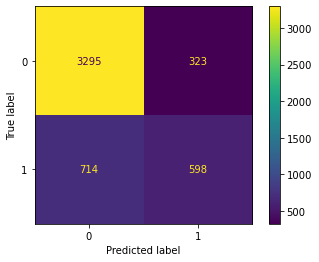



Confusion matrix for the test set
[[1414  142]
 [ 301  256]]


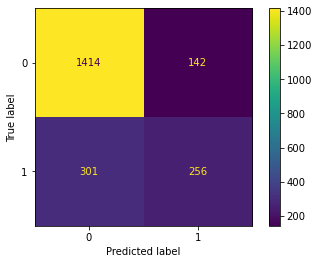

In [41]:
#do a function 

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,predicted_y_train))
plot_confusion_matrix(model,x_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, predicted_y))
plot_confusion_matrix(model,x_test,y_test, values_format = 'd')
plt.show()

### Fit a Decision Tree Classifier on the training data.

In [114]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors="coerce")
churnData.TotalCharges.fillna(churnData.TotalCharges.mean(),inplace=True)
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
# change Churn into numerical values
churnData.Churn= churnData.Churn.replace("No", 0).replace("Yes", 1)
#x.gender= churnData.gender.replace("Female", 0).replace("Male", 1) #you need to change categorical into numerical values
y = churnData.Churn
churnData.head()
#you can use categorical variables as well
churnData.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [115]:
# test_train _split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 10)

model = DecisionTreeClassifier(max_depth=4)

# scaling not needed because I'm using a decision tree


model.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test  = model.predict(x_test)

In [116]:


def performance_model(y_train, y_test, y_pred_train, y_pred_test):

    # Model validation y_train - y_pred_train
    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format


    df_train = pd.DataFrame({'Real_value': y_train, 'Predicted_value': y_pred_train})
    df_test  = pd.DataFrame({'Real_value': y_test,  'PRedicted_value': y_pred_test})

    return performance, df_train, df_test

In [117]:
performance, _ ,_ = performance_model(y_train, y_test, y_pred_train, y_pred_test)
performance

,Error_metric,Train,Test
0,Mean error,0.04,0.02
1,Mean absolute error,0.21,0.22
2,Mean squared error,0.21,0.22
3,Root mean squared error,0.46,0.46
4,Mean absolute percentual error,inf,inf
5,R2,-0.08,-0.17


In [118]:
#accurancy
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.78
1,Precision,0.56
2,Recall,0.51


#### Viszualizing the Decision Tree

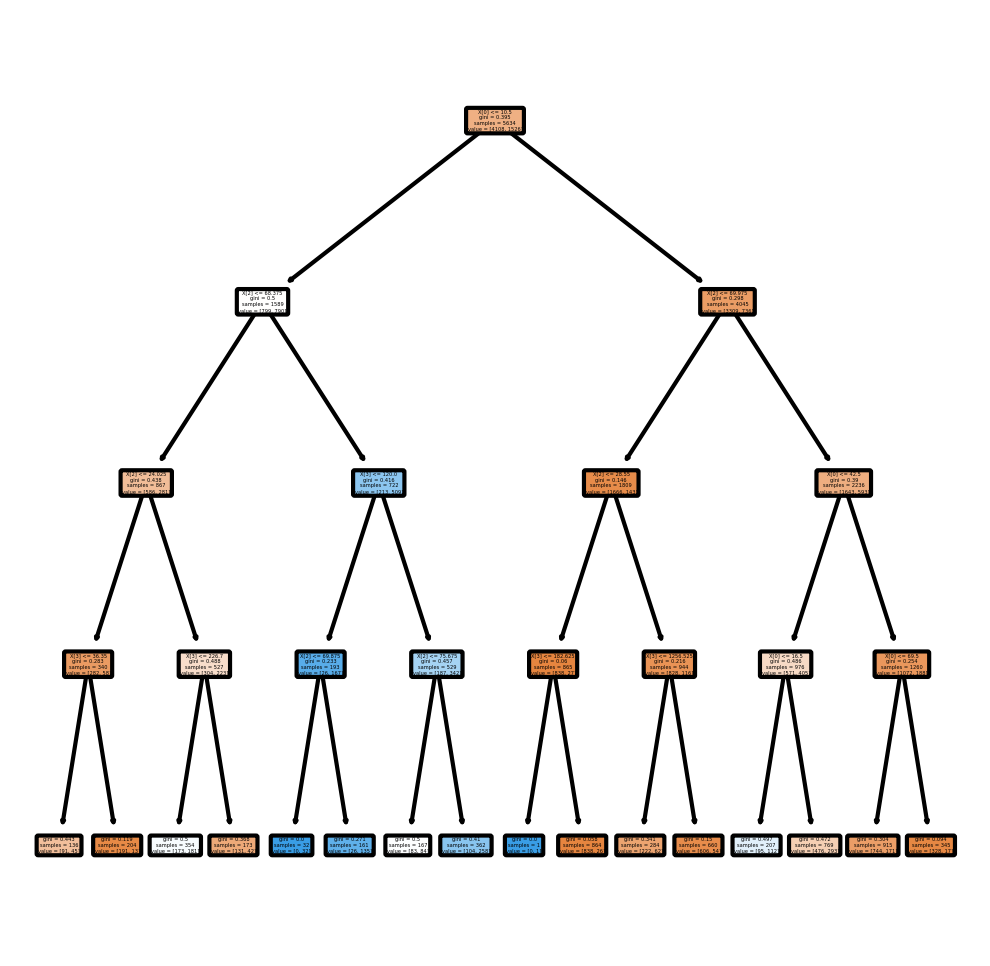

In [119]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(model,filled = True, rounded=True)
plt.show() 

In [120]:
y_train.value_counts()


0    4108
1    1526
Name: Churn, dtype: int64

First number of the value 0 = No (no churn) and second number of the value 1 = Yes (churn)

Feature importance according to the Tree:
1. "tenure"= 0
2. "MonthlyCharges" = 1
3. "TotalCharges" = 2
4. "SeniorCitizen" = 3 --> not important

First branch: If tenure is smaller or eqal than 10.05 and the TotalCharges are below or equal 68.375 and even smaller or equal than  24.025 than it is very unlikely that the customer will churn. (no churn = 247 and churn = 47)

### Bonus: apply K-fold cross validation on y ourt classifier. 

In [121]:
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

from scipy.stats import sem
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from matplotlib import pyplot



In [122]:

kf = KFold(n_splits=5, random_state=None) 

for train_index, test_index in kf.split(x):
    
    print("Train:", train_index, "Validation:",test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

Train: [1409 1410 1411 ... 7040 7041 7042] Validation: [   0    1    2 ... 1406 1407 1408]
Train: [   0    1    2 ... 7040 7041 7042] Validation: [1409 1410 1411 ... 2815 2816 2817]
Train: [   0    1    2 ... 7040 7041 7042] Validation: [2818 2819 2820 ... 4224 4225 4226]
Train: [   0    1    2 ... 7040 7041 7042] Validation: [4227 4228 4229 ... 5632 5633 5634]
Train: [   0    1    2 ... 5632 5633 5634] Validation: [5635 5636 5637 ... 7040 7041 7042]


In [123]:

kf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(x):
    
    print("Train:", train_index, "Validation:",test_index)
    x_train, x_test = x.iloc[train_index], x.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    

Train: [   0    2    3 ... 7040 7041 7042] Validation: [   1    4    5 ... 7027 7031 7037]
Train: [   0    1    2 ... 7040 7041 7042] Validation: [   3    8   21 ... 7030 7035 7039]
Train: [   0    1    2 ... 7038 7039 7041] Validation: [   9   12   17 ... 7034 7040 7042]
Train: [   0    1    2 ... 7039 7040 7042] Validation: [  13   16   18 ... 7016 7025 7041]
Train: [   1    3    4 ... 7040 7041 7042] Validation: [   0    2    6 ... 7032 7036 7038]
Train: [   0    1    2 ... 7037 7038 7039] Validation: [   5    8   17 ... 7040 7041 7042]
Train: [   0    1    2 ... 7040 7041 7042] Validation: [  15   20   25 ... 7022 7027 7032]
Train: [   1    2    5 ... 7040 7041 7042] Validation: [   0    3    4 ... 7031 7033 7039]
Train: [   0    1    3 ... 7040 7041 7042] Validation: [   2   10   13 ... 7023 7030 7038]
Train: [   0    2    3 ... 7040 7041 7042] Validation: [   1    6    7 ... 7035 7036 7037]
Train: [   0    1    2 ... 7039 7040 7042] Validation: [   3   13   20 ... 7035 7038 7041]

Note: 
The k-fold cross-validation procedure is a standard method for estimating the performance of a machine learning algorithm or configuration on a dataset.

A single run of the k-fold cross-validation procedure may result in a noisy estimate of model performance. Different splits of the data may result in very different results.

Repeated k-fold cross-validation provides a way to improve the estimated performance of a machine learning model. This involves simply repeating the cross-validation procedure multiple times and reporting the mean result across all folds from all runs. This mean result is expected to be a more accurate estimate of the true unknown underlying mean performance of the model on the dataset, as calculated using the standard error.

In [124]:
# evaluate model
scores = cross_val_score(model, x, y, scoring='accuracy', n_jobs=-1)
scores

array([0.79418027, 0.77430802, 0.76721079, 0.77911932, 0.79474432])

>1 mean=0.7720 se=0.011
>2 mean=0.7780 se=0.008
>3 mean=0.7783 se=0.007
>4 mean=0.7722 se=0.007
>5 mean=0.7706 se=0.006
>6 mean=0.7678 se=0.005
>7 mean=0.7659 se=0.005
>8 mean=0.7660 se=0.004
>9 mean=0.7679 se=0.004
>10 mean=0.7675 se=0.004
>11 mean=0.7682 se=0.004
>12 mean=0.7671 se=0.004
>13 mean=0.7667 se=0.004
>14 mean=0.7657 se=0.004
>15 mean=0.7656 se=0.004


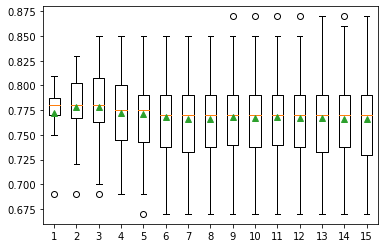

In [125]:
#https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

def evaluate_model(X, y, repeats):
    
# prepare the cross-validation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=repeats, random_state=1)
# create model
    model = DecisionTreeClassifier(max_depth=3)
    # evaluate model
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# create dataset
x, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=1)
# configurations to test
repeats = range(1,16)
results = list()

for r in repeats:
    # evaluate using a given number of repeats
    scores = evaluate_model(x, y, r)
    # summarize
    print('>%d mean=%.4f se=%.3f' % (r, mean(scores), sem(scores)))
    # store
    results.append(scores)
# plot the results
pyplot.boxplot(results, labels=[str(r) for r in repeats], showmeans=True)
pyplot.show()

-------

### Fit a Random forest Classifier on the data and compare the accuracy. 
Note: So far we have not balanced the data.

In [98]:
pd.set_option('display.max_columns', None)
from sklearn.preprocessing import OneHotEncoder

from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

In [99]:
churnData = pd.read_csv("Data/DATA_Customer-Churn.csv")
churnData.TotalCharges = pd.to_numeric(churnData.TotalCharges, errors="coerce")
churnData.TotalCharges.fillna(churnData.TotalCharges.mean(),inplace=True)
x = churnData[["tenure", "SeniorCitizen", "MonthlyCharges", "TotalCharges"]]
# change Churn into numerical values
churnData.Churn= churnData.Churn.replace("No", 0).replace("Yes", 1)

#you can use categorical variables as well
#x.gender= churnData.gender.replace("Female", 0).replace("Male", 1) #you need to change categorical into numerical values
y = churnData.Churn
churnData.head(2)

#churnData.Contract.value_counts()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,0
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,0


In [100]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [101]:
# Upsampling with SMOTE()

smote = SMOTE()
x_sm, y_sm = smote.fit_resample(x, y)
y_sm.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

In [102]:
#train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_sm, y_sm, test_size=0.25, random_state=0)

In [103]:
x_train = pd.DataFrame(x_train)
x_test = pd.DataFrame(x_test)

-------

#### RandomSearch

RandomizedSearchCV parameters:

- estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.
- param_distributions : In this we have to pass the dictionary of parameters that we need to optimize.
- cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
- n_iter : This signifies the number of parameter settings that are sampled. By default it is set as 10.
- n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.

In [107]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
#    'max_samples' : ['None', 0.5]
    }

clf = RandomForestClassifier(random_state=100)

In [108]:
random_search = RandomizedSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

In [109]:
random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
                   n_jobs=-1,
                   param_distributions={'max_features': ['sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 4],
                                        'n_estimators': [50, 100]},
                   return_train_score=True)

In [110]:
random_search.best_params_ #To check the best set of parameters returned

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt'}

--------

In [111]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=4, n_estimators=100)
cross_val_scores = cross_val_score(clf, x_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.7788935105945415


#### Feature Importance

In [112]:
feature_names = x_train.columns
feature_names = list(feature_names)

clf.fit(x_train, y_train) #needed for feature importance

RandomForestClassifier(max_features='sqrt', min_samples_split=4, random_state=0)

In [113]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)


,columns_name,score_feature_importance
2,MonthlyCharges,0.38
3,TotalCharges,0.34
0,tenure,0.26
1,SeniorCitizen,0.02
